<a href="https://colab.research.google.com/github/Vj-Ydv/Suicidal_sentiment_analysis/blob/main/Confusion_Matrix_Sentiment140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell connects to google drive, authenticates connection, and iterates over file list displaying each file's title and ID.
# it also imports and installs all the necessary libraries
!pip install -U -q PyDrive
!pip install -U -q wordcloud
!pip install -U -q bokeh
!pip install textblob
!pip install sklearn

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

from wordcloud import WordCloud
from scipy.stats import hmean
from scipy.stats import norm
from pylab import *
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from time import time

  

     |████████████████████████████████| 366 kB 23.2 MB/s 
     |████████████████████████████████| 18.5 MB 22.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.2 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [7]:
# upload file into pandas dataframe and drop unnecessary columns and neutral rows

# Using columns 1,2 because col 0 is the number of the row, could be changed if the row number is removed from the csv file.
df_clean = pd.read_csv('Dataset_For_Project/clean_Tweets_sentiment140.csv', usecols = [1,2], encoding='latin-1')
df_clean.head()

,text,target
0,"- aww, that's a bummer. you shoulda got dav...",0
1,is upset that he can't update his facebook by ...,0
2,i dived many times for the ball. managed to s...,0
3,my whole body feels itchy and like its on fire,0
4,"no, it's not behaving at all. i'm mad. why am...",0


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean)

In [9]:
print(train.shape)
#print(test.shape)

(1200000, 2)


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['target'] = labelencoder.fit_transform(train['target'])
test['target'] = labelencoder.fit_transform(test['target'])

# **Word Embedding Techniques**

In [11]:
# 1 Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train)
X_train_bow = cv.fit_transform(train['text'])
X_test_bow = train['target']
Y_train_bow = cv.transform(test['text'])
Y_test = test['target']

In [12]:
# 2 TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['text'])
X_test_tfidf = train['target']
Y_train_tdidf =vectorizer.transform(test['text'])

In [13]:
# 3 Hashing
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['text'])
X_test_hash = train['target']
Y_train_hash = hv.transform(test['text'])

# **Accuracy calculation of various models using various word embedding techniques**

In [14]:
from sklearn.model_selection import cross_val_score


In [15]:
# Rigde with bag of word
from sklearn import linear_model
alpha = [80.0, 90.0, 100.0, 110.0, 120.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_bow, X_test_bow, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  80.0
[0.80025388 0.80168385 0.8002016  0.80060323 0.79847538]
0.8002435879680988


alpha:  90.0
[0.80009763 0.80135464 0.79997561 0.8003414  0.79817805]
0.7999894667801588


alpha:  100.0
[0.79983243 0.80120631 0.79966186 0.79996261 0.79795207]
0.7997230591209733


alpha:  110.0
[0.79967628 0.80089684 0.79940346 0.79956763 0.7977439 ]
0.7994576227739854


alpha:  120.0
[0.79942259 0.80062991 0.79908987 0.7994165  0.79758777]
0.7992293301481252




In [16]:
# MultinomialNB with bag of word
from sklearn.naive_bayes import MultinomialNB
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
for a in alpha:
    mnb = MultinomialNB()
    scores = cross_val_score(mnb, X_train_bow, X_test_bow, cv=5, scoring='f1')
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1e-10
[0.77892281 0.77858802 0.77750551 0.77912178 0.77717271]
0.7782621670515166


alpha:  1e-05
[0.77892281 0.77858802 0.77750551 0.77912178 0.77717271]
0.7782621670515166


alpha:  0.1
[0.77892281 0.77858802 0.77750551 0.77912178 0.77717271]
0.7782621670515166


alpha:  1.0
[0.77892281 0.77858802 0.77750551 0.77912178 0.77717271]
0.7782621670515166


alpha:  2.0
[0.77892281 0.77858802 0.77750551 0.77912178 0.77717271]
0.7782621670515166


alpha:  5.0
[0.77892281 0.77858802 0.77750551 0.77912178 0.77717271]
0.7782621670515166




In [17]:
# Rigde with TF-IDF
alpha = [500.0, 1500.0, 2500.0, 3000.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_tfidf, X_test_tfidf, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  500.0
[0.79614921 0.79736204 0.79615909 0.79613174 0.79471357]
0.7961031288602974


alpha:  1500.0
[0.8000506  0.80084078 0.79990873 0.79986958 0.79824644]
0.7997832270964609


alpha:  2500.0
[0.80075641 0.80167166 0.80088777 0.80070532 0.79900585]
0.8006054026692022


alpha:  3000.0
[0.80107525 0.80180331 0.80116764 0.80081754 0.79938248]
0.8008492425673233




In [18]:
# MultinomialNB with TF-IDF
alpha = [175.0, 200.0, 225.0, 250.0, 300.0]
for a in alpha:
    mnb = MultinomialNB()
    scores = cross_val_score(mnb, X_train_tfidf, X_test_tfidf, cv=5, scoring='f1')
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  175.0
[0.75699284 0.7556589  0.75609052 0.75776529 0.75644055]
0.756589619892641


alpha:  200.0
[0.75699284 0.7556589  0.75609052 0.75776529 0.75644055]
0.756589619892641


alpha:  225.0
[0.75699284 0.7556589  0.75609052 0.75776529 0.75644055]
0.756589619892641


alpha:  250.0
[0.75699284 0.7556589  0.75609052 0.75776529 0.75644055]
0.756589619892641


alpha:  300.0
[0.75699284 0.7556589  0.75609052 0.75776529 0.75644055]
0.756589619892641




In [19]:
# Rigde with Hash
alpha = [1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_hash, X_test_hash, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1.1
[0.79910223 0.79976549 0.7991521  0.79895794 0.79802931]
0.7990014143632252


alpha:  1.2
[0.79917157 0.79986788 0.79929575 0.79910151 0.79809049]
0.7991054387633801


alpha:  1.3
[0.79919477 0.79998844 0.79930735 0.79918246 0.79831357]
0.7991973158922334


alpha:  1.4
[0.79922947 0.80002147 0.79934857 0.79923529 0.79822944]
0.7992128488274464


alpha:  1.5
[0.79927406 0.80016512 0.79931396 0.7992502  0.79831874]
0.7992644151934546


alpha:  2.0
[0.79935334 0.80032678 0.7994692  0.79933295 0.79841633]
0.7993797187351777




## **Accuracy calculation**

In [20]:
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.2)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['target']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)*100

79.6805

In [21]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_true, y_pred, target_names = ['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.80      0.79      0.79    199954
    Positive       0.79      0.81      0.80    200046

    accuracy                           0.80    400000
   macro avg       0.80      0.80      0.80    400000
weighted avg       0.80      0.80      0.80    400000



## **Confusion matrix**

Text(51.0, 0.5, 'Actual')

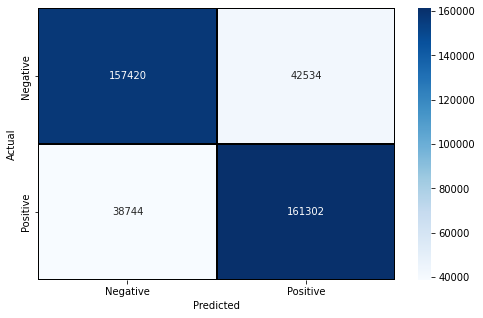

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative','Positive'], 
            yticklabels = ['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")